# Bayesian Linear Regression

For Bayesian Methods, the general steps are:

1. Choose a likelihood model, $p(D|\theta)$. This is the probability of the data given theta.
2. Choose the prior distribution, $p(\theta)$. This is the distribution of $\theta$.
3. Gets some data and compute the posterior distrubiotn, $p(\theta|D)$. 
4. Use the posterior to do something. For example, we can pick the $\hat{\theta} = E[\theta|D]$ or get prediction intervals. 


### Bayesian Gaussian Linear Regression

Let follow the steps to get a Bayesian version of linear regression:


1. $P(y|x, w) = N(w^Tx, \sigma^2)$
2. Gaussian prior, $p(w) = N(0, \Sigma_0)$
3. Posterior distribution = $N(\mu_p,\Sigma_p)$ where  
    - $\mu_p = (X^TX + \sigma^2\Sigma_0^{-1})^{-1}X^Ty$  
    - $\Sigma_P = (\sigma^{-2}X^TX+\Sigma_0^{-1})^{-1}$

# 1-D Bayesian Linear Regression

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


from scipy.stats import multivariate_normal, norm

%matplotlib inline

In [2]:
def plot_dist(m,s,w_true, ax):

    X,Y = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-1, 1, 500))
    h = multivariate_normal.pdf(np.dstack([X,Y]),m,s)
    
    p = plt.figure(figsize=(5,5))
    ax.pcolormesh(X, Y, h, cmap = 'viridis')
    ax.scatter(w_true[0], w_true[1], marker = 'x', c = 'w', s = 150)
    ax.set_title('Posterior Distribution')
    
    return p

def plot_pred(m, s,s_y, ax):
    
    m_predictive = lambda x: m.dot(x)
    s_predictive = lambda x: x.T.dot(s).dot(x) + s_y

    X,Y = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
    pred = []
    for x in X[0]:

        pred.append(multivariate_normal.pdf(Y[:,0],m_predictive(np.array([1,x])),s_predictive(np.array([1,x]))))
        
    ax.pcolormesh(X, Y, np.array(pred).T, cmap = 'viridis')
#     ax.imshow(np.array(pred).T)
    ax.set_title('Predictive Distribution')
    
def plot_dist_func(m,s, w_true, s_y,data):

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
    ax1.set(adjustable='box-forced', aspect='equal')
    ax2.set(adjustable='box-forced', aspect='equal')
    ax3.set(adjustable='box-forced', aspect='equal')
    
    T = np.random.multivariate_normal(m,s,500)

    plot_dist(m,s, w_true, ax1)
    

    for t in T:

        x1 = np.array([1,-1])
        x2 = np.array([1,1])

        y1 = t.dot(x1)
        y2= t.dot(x2)

        y = np.array([y1,y2])
        x = np.array([-1,1])

        ax2.plot(x,y, alpha = 0.05, c = 'g')
        ax2.set_xlim([-1,1])
        ax2.set_ylim([-1,1])

    ax2.scatter(data[0,:],data[1,:], alpha = 1, c = 'r')
    ax2.set_title('Data Space')
    
    plot_pred(m, s,s_y, ax3)
        
    return f

In [3]:
def compute_posterior_mean(X,y, prior_cov, std_y):
    
#     std_y+=0.0000001
    
    return np.linalg.inv(((X.T @ X) + std_y**2*np.linalg.inv(prior_cov))) @ X.T @ y
    

def compute_posterior_cov(X,y, prior_cov, std_y):
    
#     std_y+=0.0000001
    
    return np.linalg.inv(std_y**-2 * X.T @ X + np.linalg.inv(prior_cov))

/home/pli/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


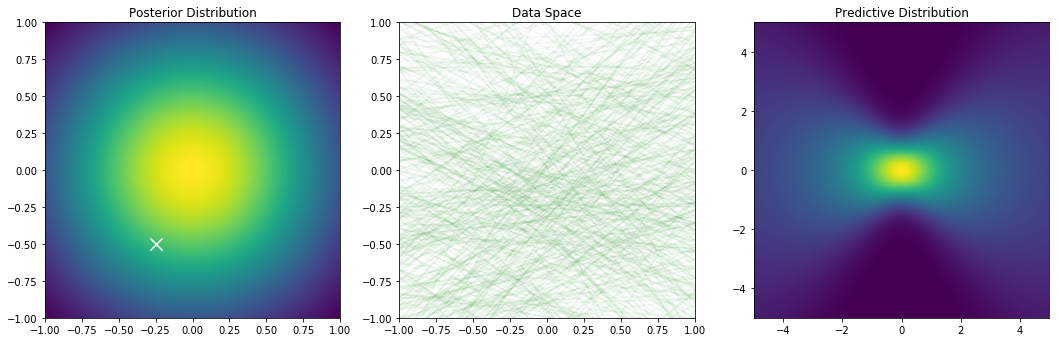

<Figure size 360x360 with 0 Axes>

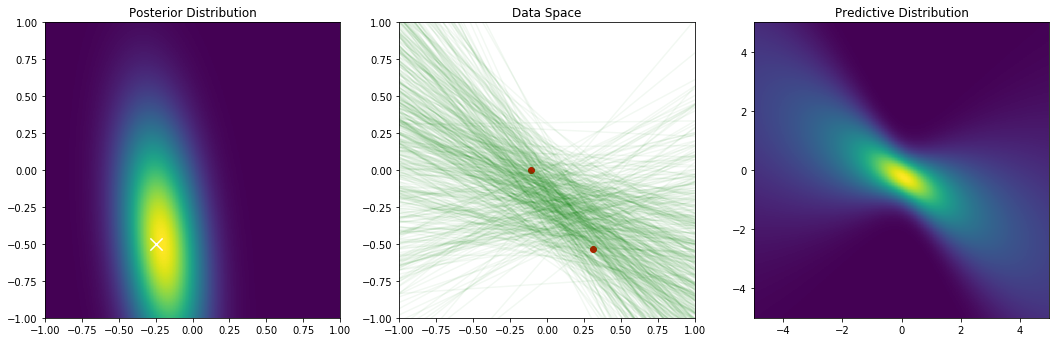

<Figure size 360x360 with 0 Axes>

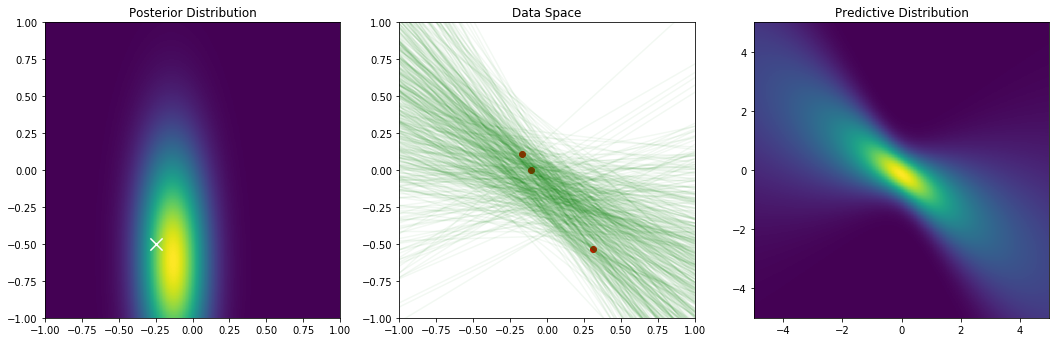

<Figure size 360x360 with 0 Axes>

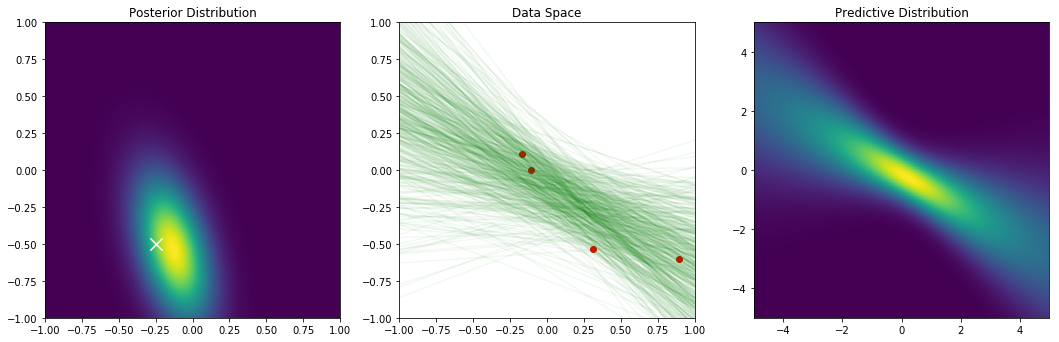

<Figure size 360x360 with 0 Axes>

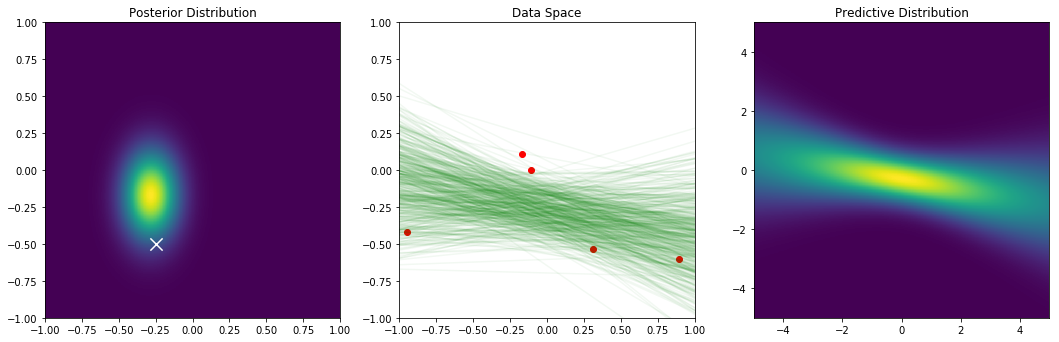

<Figure size 360x360 with 0 Axes>

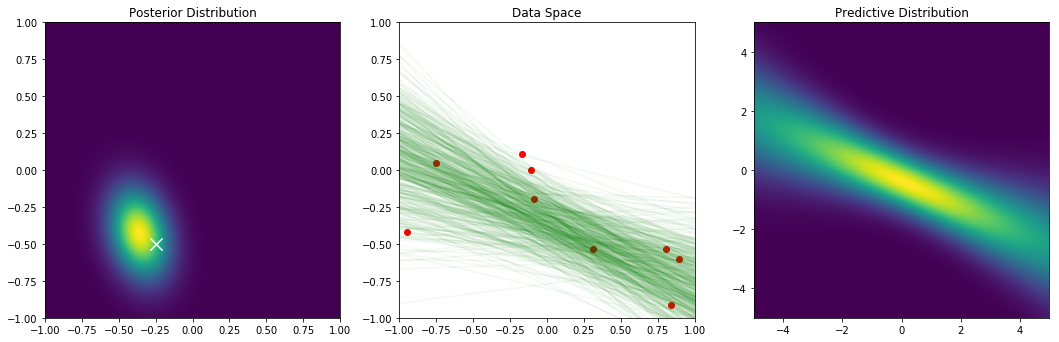

<Figure size 360x360 with 0 Axes>

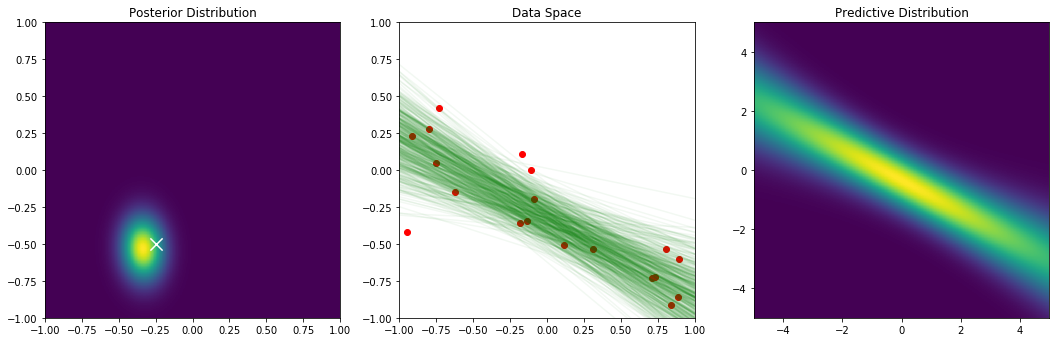

<Figure size 360x360 with 0 Axes>

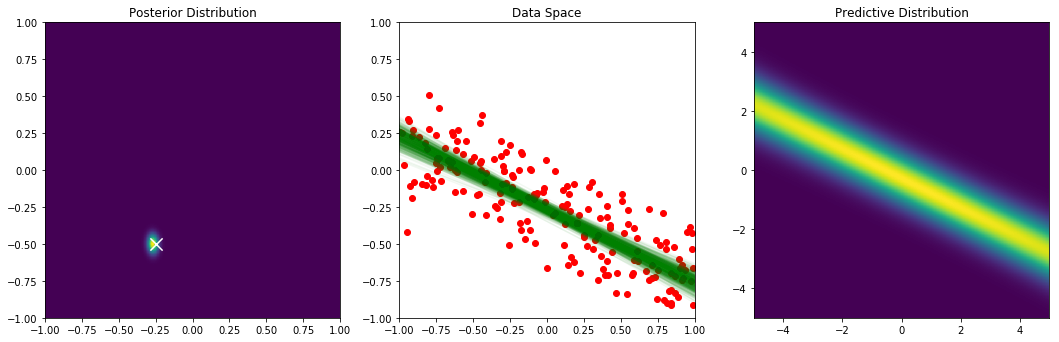

<Figure size 360x360 with 0 Axes>

In [4]:
m_prior = np.array([0,0])
s_prior = 0.5*np.eye(2)
w_true = np.array([-0.25, -0.5])

# generate data
n = 500
e = np.random.randn(n)*0.2
x = 2*np.random.rand(n)-1
y = w_true[0] + x*w_true[1]+e

data = np.array([x,y])

m = m_prior
s = s_prior

p = plot_dist_func(m,s, w_true, 0, data[:,:0])

for i in [2,3,4,5,10, 20,200]:

    d = data[:,:i]
    X = np.array([np.ones(d[0].shape),d[0]]).T
    y = d[1,:]
    
    s_y = np.std(y)
    
    # posterior distribution
    m = compute_posterior_mean(X,y, s_prior, s_y)
    s = compute_posterior_cov(X,y, s_prior, s_y)
           
    # plot
    p = plot_dist_func(m,s, w_true,s_y, d);
